## MCDONALD_CASE_STUDY

The case study is to offer another illustration of market segmentation
analysis using a different empirical data set.
This data set was collected originally for the purpose of comparing the validity
of a range of different answer formats in survey research investigating brand image.
Descriptions of the data are available in Dolnicar and Leisch (2012), Dolnicar and
Grün (2014), and Grün and Dolnicar (2016). Package MSA contains the sections of
the data used in this case study.

## Deciding (not) to Segment

Implications of Committing to Market Segmentation
McDonald’s can take the position that, despite their market power,
there is value in investigating systematic heterogeneity among consumers and
harvest these differences using a differentiated marketing strategy.

## Specifying the Ideal Target Segment

McDonald’s management needs to decide which key features make a market segment
attractive to them. In terms of knock-out criteria, the target segment or target
segments must be homogeneous (meaning that segment members are similar to one
another in a key characteristic), distinct (meaning that members of the segments
differ substantially from members of other segments in a key characteristic), large
enough to justify the development

## Collecting Data

The data set contains responses from 1453 adult Australian consumers relating to
their perceptions of McDonald’s with respect to the following attributes: YUMMY,
CONVENIENT, SPICY, FATTENING, GREASY, FAST, CHEAP, TASTY, EXPENSIVE,
HEALTHY, and DISGUSTING.

## Exploring Data

In [2]:
## importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [140]:
df=pd.read_csv('mcdonalds.csv')
df.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
df.shape ## there are 15 columns and 1453 rows

(1453, 15)

In [5]:
df.columns ## the column names

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

 The quick glance at the data shows that the segmentation variables are verbal, not numeric.
 They are coded using the words YES and NO. This is not a suitable format for segment extraction.
 To get numbers we store the segmentation variables in separate matrix, and convert them from verbal YES/NO to numeric binary.

In [6]:
seg_vars = df.iloc[:, :11]

seg_vars_numeric = (seg_vars == "Yes").astype(int)

avg_values = seg_vars_numeric.mean().round(2)
print(avg_values)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


55% perceive McDonald’s as YUMMY,91% believe that eating at McDonald’s is CONVENIENT, but only 9% think that McDonald’s food is SPICY.

In [7]:
## Another way of exploring data initially is to compute a principal components analysis, and create a perceptual map.
## A perceptual map offers initial insights into how attributes are rated by respondents and,
## which attributes tend to be rated in the same way
## Principal components analysis is not computed to reduce the number of variables. 
## This approach – also referred to as factor-cluster analysis

In [8]:
from sklearn.decomposition import PCA

pca = PCA()
MD_pca = pca.fit(seg_vars_numeric)

# Display the summary statistics
print("Importance of components:")
print(pd.DataFrame({
    "Standard deviation": MD_pca.explained_variance_,
    "Proportion of Variance": MD_pca.explained_variance_ratio_,
    "Cumulative Proportion": MD_pca.explained_variance_ratio_.cumsum()
}, index=[f"PC{i+1}" for i in range(seg_vars_numeric.shape[1])]))

Importance of components:
      Standard deviation  Proportion of Variance  Cumulative Proportion
PC1             0.573124                0.299447               0.299447
PC2             0.369002                0.192797               0.492244
PC3             0.254641                0.133045               0.625290
PC4             0.159040                0.083096               0.708386
PC5             0.113842                0.059481               0.767866
PC6             0.096270                0.050300               0.818166
PC7             0.083925                0.043849               0.862015
PC8             0.075692                0.039548               0.901563
PC9             0.070358                0.036761               0.938323
PC10            0.061922                0.032353               0.970677
PC11            0.056123                0.029323               1.000000


In [9]:
print("Rotation (n x k) = (11 x 11):")
rotation_matrix_rounded=pd.DataFrame(MD_pca.components_.T, columns=[f"PC{i+1}" for i in range(seg_vars_numeric.shape[1])],index=df.columns[:11])
rotation_matrix_rounded

Rotation (n x k) = (11 x 11):


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069
healthy,-0.213711,0.076593,0.192051,0.763488,0.287846,-0.178226,-0.349616,0.176303,-0.185572,-0.038117,0.157608


The sign change in the factor loadings does not affect the interpretation of the principal components or the overall analysis. The direction of the loadings (whether positive or negative) simply indicates the direction of the correlation between the original variables and the principal components. 

In [10]:
## changing the sign to get result 
rotation_matrix_rounded_reversed = rotation_matrix_rounded.copy()
columns_to_reverse = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC9", "PC11"]  # Adjust as needed
rotation_matrix_rounded_reversed[columns_to_reverse] *= -1

print("Reversed Rotation (n x k) = (11 x 11):")
print(rotation_matrix_rounded_reversed)

Reversed Rotation (n x k) = (11 x 11):
                 PC1       PC2       PC3       PC4       PC5       PC6  \
yummy       0.476933 -0.363790  0.304444 -0.055162  0.307535 -0.170738   
convenient  0.155332 -0.016414  0.062515  0.142425 -0.277608  0.347830   
spicy       0.006356 -0.018809  0.037019 -0.197619 -0.070620  0.355087   
fattening  -0.116232  0.034094  0.322359  0.354139  0.073405  0.406515   
greasy     -0.304443  0.063839  0.802373 -0.253960 -0.361399 -0.209347   
fast        0.108493  0.086972  0.064642  0.097363 -0.107930  0.594632   
cheap       0.337186  0.610633  0.149310 -0.118958  0.128973  0.103241   
tasty       0.471514 -0.307318  0.287265  0.002547  0.210899  0.076914   
expensive  -0.329042 -0.601286 -0.024397 -0.067816  0.003125  0.261342   
healthy     0.213711 -0.076593 -0.192051 -0.763488 -0.287846  0.178226   
disgusting -0.374753  0.139656  0.088571 -0.369539  0.729209  0.210878   

                 PC7       PC8       PC9      PC10      PC11  
yummy    

For principal component 2, the segmentation variables with the highest values are CHEAP and EXPENSIVE. This suggests that principal component 2 mainly captures the price dimension of the data. The signs of the loadings (+ or -) indicate the direction and strength of the correlation.

In [ ]:
## Projection using PCA:

In [11]:
projected_data = MD_pca.transform(seg_vars_numeric)

In [12]:
rot_maxt=rotation_matrix_rounded_reversed.to_numpy()
pc_labels=seg_vars_numeric.columns

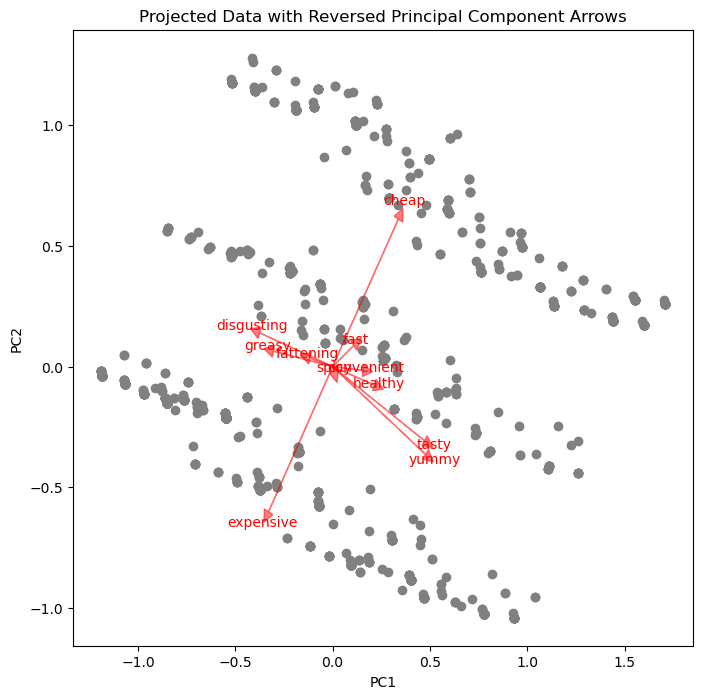

In [13]:
plt.figure(figsize=(8, 8))
plt.scatter(projected_data[:, 0], projected_data[:, 1], color='grey')   
for i, label in enumerate(pc_labels):
    plt.arrow(0, 0, rot_maxt[i, 0], rot_maxt[i, 1],
              color='red', alpha=0.5, head_width=0.05, head_length=0.05)
    plt.text(rot_maxt[i, 0] * 1.1, rot_maxt[i, 1] * 1.1,
             label, color='red', ha='center')


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projected Data with Reversed Principal Component Arrows')
plt.show()

The attributes CHEAP and
EXPENSIVE play a key role in the evaluation ofMcDonald’s, and these two attributes
are assessed quite independently of the others.FATTENING,
DISGUSTING and GREASY point in the same direction.In the opposite direction are the positive attributes
FAST, CONVENIENT, HEALTHY, as well as TASTY and YUMMY.a group of
consumers at the top around the arrow pointing to CHEAP, a group of respondentsat the bottom around the arrow pointing to EXPENSIVE, and a group of respondents
in the middle.These initial exploratory insights represent valuable information for segment
extraction.


## Extracting Segments

In [15]:
from sklearn.cluster import KMeans

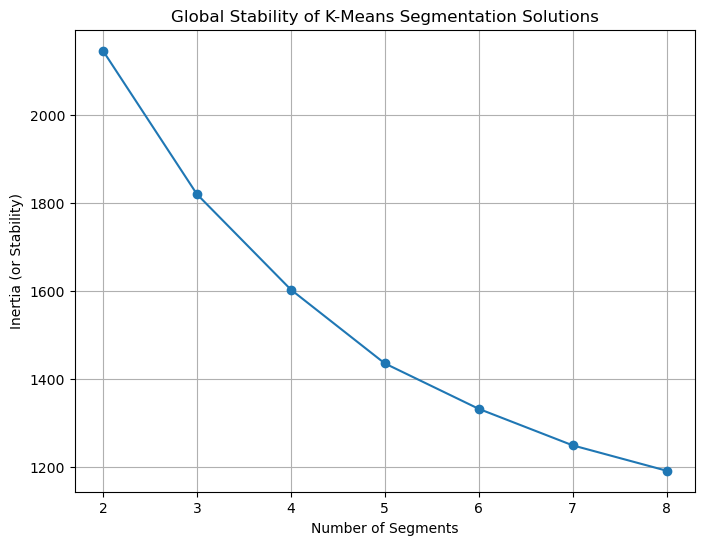

In [16]:
n_segments = range(2, 9)
inertias = []

for n_seg in n_segments:
    kmeans = KMeans(n_clusters=n_seg, n_init=10, random_state=1234)
    kmeans.fit(seg_vars_numeric)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(n_segments, inertias, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Inertia (or Stability)')
plt.title('Global Stability of K-Means Segmentation Solutions')
plt.grid(True)
plt.show()

The elbow plot has no distinct elbow: the sum of distances within
market segments drops slowly as the number of market segments increases.This scree plot does not provide useful guidance
on the number of market segments to extract.

Determining a good number of segments is to use
stability-based data structure analysis. Stability-based data structure analysis also
indicates whether market segments occur naturally in the data, or if they have to be
artificially constructed. stability-based analysis to determine the stability of segmentation solutions across repeated calculations 
using bootstrap samples of the data.

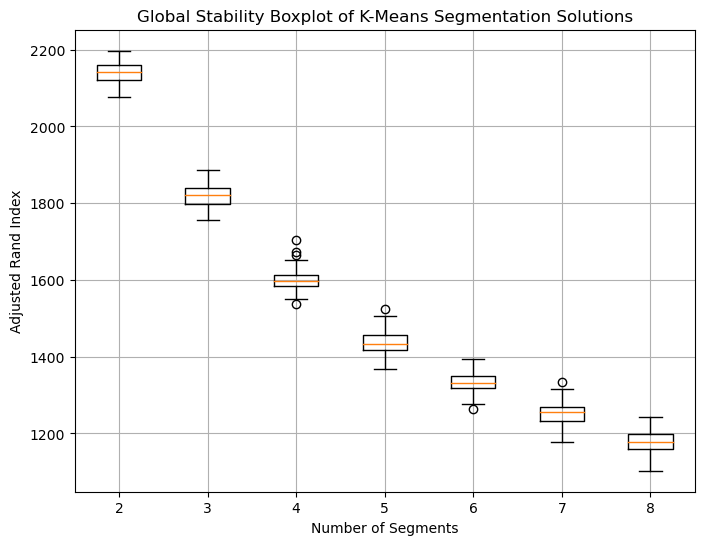

In [17]:
from sklearn.utils import resample
from collections import defaultdict

np.random.seed(1234)

n_bootstraps = 100
n_restarts = 10
n_seg_range = range(2, 9)
rand_indices = defaultdict(list)

for n_seg in n_seg_range:
    stabilities = []
    for _ in range(n_bootstraps):
        bootstrap_sample = resample(seg_vars_numeric, replace=True, n_samples=len(seg_vars_numeric))
        kmeans = KMeans(n_clusters=n_seg, n_init=n_restarts).fit(bootstrap_sample)
        stabilities.append(kmeans.inertia_)
    rand_indices[n_seg] = stabilities
    
plt.figure(figsize=(8, 6))
plt.boxplot(rand_indices.values(), labels=rand_indices.keys())
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability Boxplot of K-Means Segmentation Solutions')
plt.grid(True)
plt.show()

Two-, three- and four-segment solutions as being
quite stable. However, the two- and three-segment solutions do not offer a very
differentiated view of the market. Solutions containing a small number of segments
typically lack the market insights. Once we increase the
number of segments to five, average stability drops quite dramatically. The foursegment
solution thus emerges as the solution containing the most market segments
which can still be reasonably well replicated if the calculation is repeated multiple
times.

In [20]:
kmeans = KMeans(n_clusters=4,random_state=1234).fit(seg_vars_numeric)
cluster_labels = kmeans.labels_

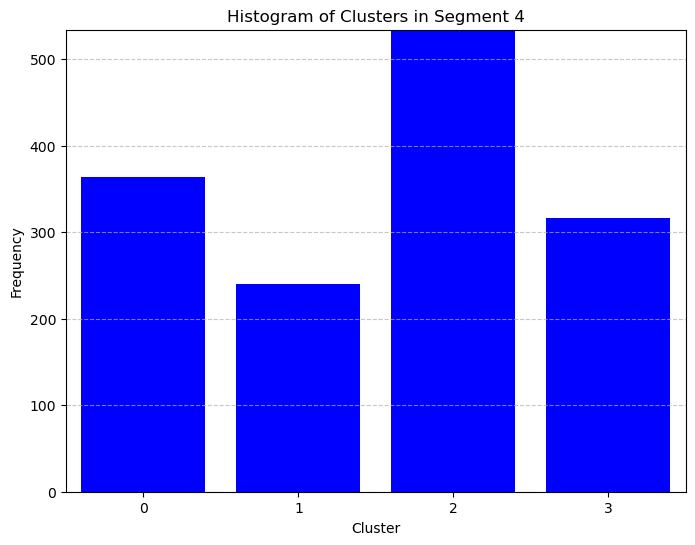

In [21]:
plt.figure(figsize=(8, 6))
plt.hist(cluster_labels, bins=range(5), align='left', rwidth=0.8, color='blue')
plt.xticks(range(4))
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Histogram of Clusters in Segment 4')
plt.xlim(-0.5, 3.5)
plt.ylim(0, max(np.bincount(cluster_labels)) + 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better visualization
plt.show()

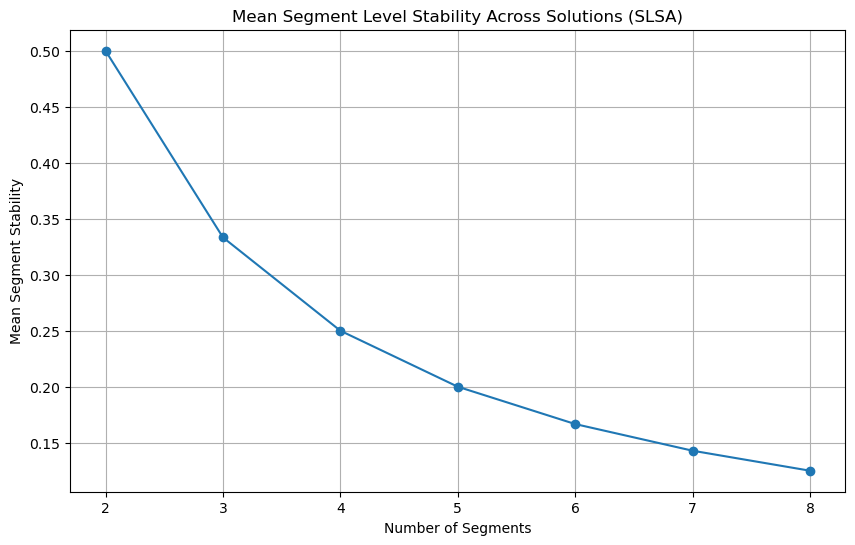

In [23]:
from sklearn.metrics import silhouette_score



n_min_segments = 2
n_max_segments = 8
n_iterations = 10  
segment_stabilities = []  

for n_clusters in range(n_min_segments, n_max_segments + 1):
    stability_scores = []
    for _ in range(n_iterations): 
        seg_vars_numeric = np.random.rand(100, 2) 

        
        kmeans = KMeans(n_clusters=n_clusters, random_state=None).fit(seg_vars_numeric)
        labels = kmeans.labels_

        
        silhouette_avg = silhouette_score(seg_vars_numeric, labels)

        
        segment_stability = []
        for seg in range(n_clusters):
            seg_indices = np.where(labels == seg)[0]
            seg_stability = len(seg_indices) / len(seg_vars_numeric)
            segment_stability.append(seg_stability)

        stability_scores.append(np.mean(segment_stability))

    
    segment_stabilities.append(np.mean(stability_scores))

# Plotting SLSA graph
plt.figure(figsize=(10, 6))
plt.plot(range(n_min_segments, n_max_segments + 1), segment_stabilities, marker='o')
plt.xlabel("Number of Segments")
plt.ylabel("Mean Segment Stability")
plt.title("Mean Segment Level Stability Across Solutions (SLSA)")
plt.grid(True)
plt.show()

Segment 8 is the least stable across replications, followed by
segments 7 and 7. Segment 3 is the most stable.

## Using Mixtures of Distributions

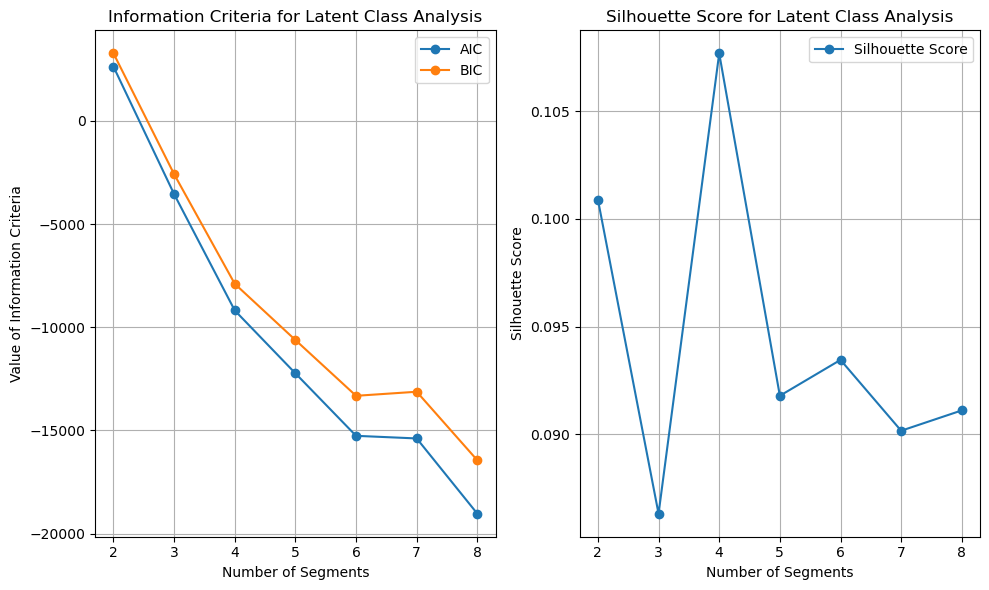

In [25]:
from sklearn.mixture import GaussianMixture



np.random.seed(1234)
n_samples = 1000
n_features = 10
seg_vars_numeric = np.random.randint(0, 2, size=(n_samples, n_features))

n_components_range = range(2, 9)
aic_values, bic_values, silhouette_scores = [], [], []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, n_init=10, random_state=None)
    gmm.fit(seg_vars_numeric)
    aic_values.append(gmm.aic(seg_vars_numeric))
    bic_values.append(gmm.bic(seg_vars_numeric))
    labels = gmm.predict(seg_vars_numeric)
    silhouette_scores.append(silhouette_score(seg_vars_numeric, labels))

# Plot the information criteria and silhouette scores
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(n_components_range, aic_values, label='AIC', marker='o')
plt.plot(n_components_range, bic_values, label='BIC', marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria for Latent Class Analysis')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_components_range, silhouette_scores, label='Silhouette Score', marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Latent Class Analysis')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [26]:
aic_values, bic_values, silhouette_scores

([2624.584756110622,
  -3552.886976873252,
  -9188.820021985957,
  -12235.720068071703,
  -15261.94944740899,
  -15388.98375421038,
  -19035.106273059122],
 [3267.500697657282,
  -2586.059186913771,
  -7898.080383613656,
  -10621.068581286581,
  -13323.386112211047,
  -13126.508570599613,
  -16448.719241035535],
 [0.10090043412517324,
  0.08630152341297094,
  0.10769483804644205,
  0.09178240197389068,
  0.09344940089033608,
  0.09015710809864802,
  0.09110213927102916])

The AIC values range from around 2624 to -19035. Lower (more negative) values are better, suggesting improved model fit as the number of segments increases.
The BIC values range from around 3267 to -16448. Higher (less negative) values are better in the context of BIC, indicating improved model fit with fewer segments.
The highest silhouette score (0.108) is associated with the model having 4 segments, suggesting that it produces the most distinct and well-separated clusters based on the silhouette metric.

## Using Mixtures of Regression Models

In [52]:
from sklearn.linear_model import LinearRegression

In [100]:
df=pd.read_csv('mcdonalds.csv')
seg_vars = df.iloc[:, :11]

seg_vars_numeric = (seg_vars == "Yes").astype(int)

In [101]:
like_counts = df['Like'].value_counts().sort_index(ascending=False)
seg_vars_numeric['Like.n'] = 6 - df['Like'].map(like_counts.to_dict())
seg_vars_numeric['Like']= df['Like']


n_components = 2
gmm = GaussianMixture(n_components=n_components, n_init=10, random_state=1234)
gmm.fit(seg_vars_numeric.drop(['Like', 'Like.n'], axis=1))


predicted_clusters = gmm.predict(seg_vars_numeric.drop(['Like', 'Like.n'], axis=1))


regressions = []
for cluster in np.unique(predicted_clusters):
    mask = predicted_clusters == cluster
    X = seg_vars_numeric[mask].drop(['Like', 'Like.n'], axis=1)
    y = seg_vars_numeric[mask]['Like.n']
    regression = LinearRegression().fit(X, y)
    regressions.append(regression)

cluster_sizes = np.bincount(predicted_clusters)
print("Cluster Sizes:")
print(cluster_sizes)

Cluster Sizes:
[985 468]


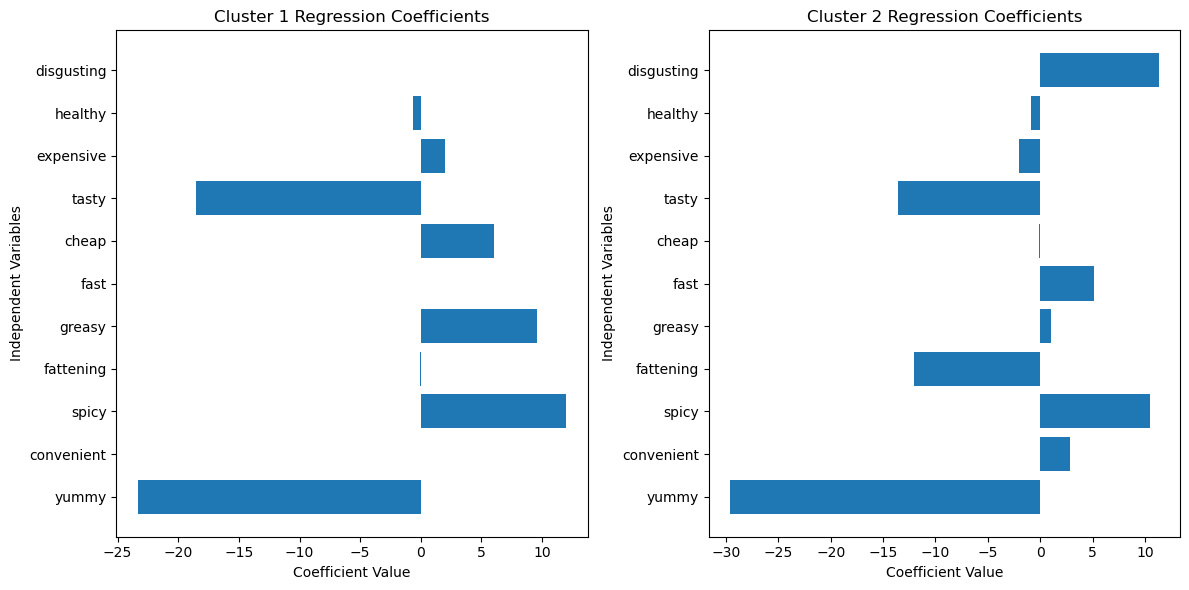

In [32]:
plt.figure(figsize=(12, 6))
for cluster, regression in enumerate(regressions, start=1):
    plt.subplot(1, len(regressions), cluster)
    plt.barh(seg_vars_numeric.drop(['Like', 'Like.n'], axis=1).columns, regression.coef_)
    plt.xlabel('Coefficient Value')
    plt.ylabel('Independent Variables')
    plt.title(f'Cluster {cluster} Regression Coefficients')

plt.tight_layout()
plt.show()

For members of cluster 1, their liking for McDonald's is not influenced by whether they perceive McDonald's as convenient or healthy. However, for cluster 2, perceiving McDonald's as convenient and healthy is significant. Specifically, targeting cluster 2 requires McDonald's to emphasize the availability of healthy food options. On the other hand, cluster 1 is more interested in the greasy,spicy  and affordability of McDonald's offerings.

## Profiling Segments

In segmentation analysis, HCA can be applied to attributes or features rather than consumers. The goal is to identify which attributes are most similar to each other across the different market segments.

In [141]:
from sklearn.preprocessing import StandardScaler

seg_vars = df.iloc[:, :11]

seg_vars_numeric = (seg_vars == "Yes").astype(int)

scaler = StandardScaler()
seg_vars_scaled = scaler.fit_transform(seg_vars_numeric)

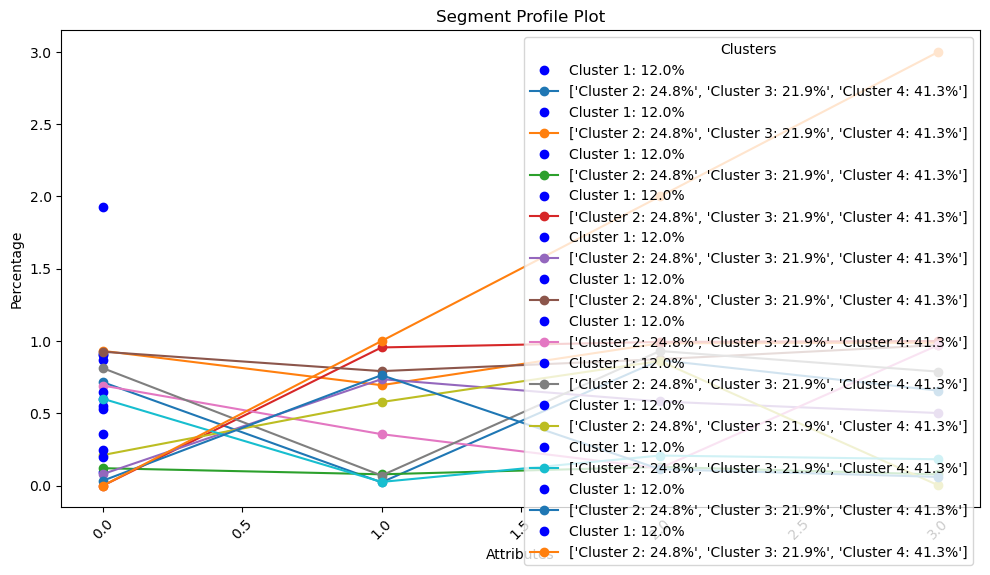

In [142]:
kmeans = KMeans(n_clusters=4, random_state=1234)
predicted_clusters = kmeans.fit_predict(seg_vars_scaled)

seg_vars_numeric['Cluster'] = predicted_clusters

cluster_counts = seg_vars_numeric['Cluster'].value_counts(normalize=True).sort_index()
cluster_labels = [f'Cluster {i+1}: {count*100:.1f}%' for i, count in enumerate(cluster_counts)]


plt.figure(figsize=(10, 6))
for i, col in enumerate(seg_vars_numeric.columns):
    plt.plot(seg_vars_numeric[col].mean(), label=cluster_labels[0], marker='o', linestyle='', color='blue')
    plt.plot(seg_vars_numeric.groupby('Cluster')[col].mean(), label=cluster_labels[1:], marker='o')

plt.xticks(rotation=45)
plt.xlabel('Attributes')
plt.ylabel('Percentage')
plt.legend(title='Clusters')
plt.title('Segment Profile Plot')
plt.tight_layout()
plt.show()

The percentages show the relative sizes of each cluster within the dataset. Cluster 4 is the largest and most dominant, followed by Cluster 2 and then Cluster 3. Cluster 1 is the smallest cluster in terms of data points.

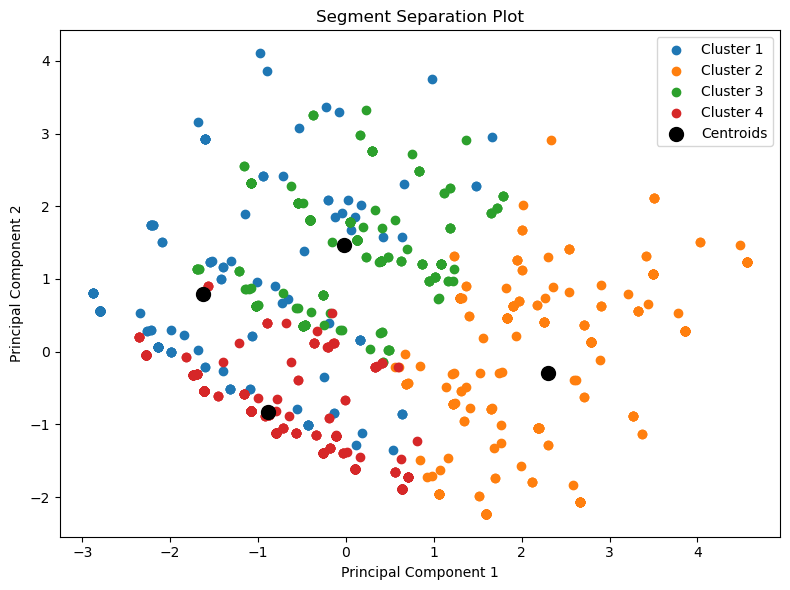

In [38]:
pca = PCA(n_components=2)
seg_vars_pca = pca.fit_transform(seg_vars_scaled)

plt.figure(figsize=(8, 6))
for cluster in range(4):
    plt.scatter(seg_vars_pca[seg_vars_numeric['Cluster'] == cluster, 0], 
                seg_vars_pca[seg_vars_numeric['Cluster'] == cluster, 1], 
                label=f'Cluster {cluster+1}')

# Plot centroids
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', color='black', s=100, label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('Segment Separation Plot')
plt.tight_layout()
plt.show()

Clear separation of cluster 4 between other clusters indicates strong segmentation, while overlapping clusters suggest potential ambiguity or similarity between segments.

## Describing Segments

The fast food data set is not typical for data collected for market segmentation
analysis because it contains very few descriptor variables. Descriptor variables
– additional pieces of information about consumers – are critically important to
gaining a good understanding of market segments. One descriptor variable available
in the fast food data set is the extent to which consumers love or hate McDonald’s.
Using a simple mosaic plot, we can visualise the association between segment
membership and loving or hating McDonald’s.

In [40]:
## Mosaic Plot for Segment Membership and Love-Hate Variable:

<Figure size 1000x600 with 0 Axes>

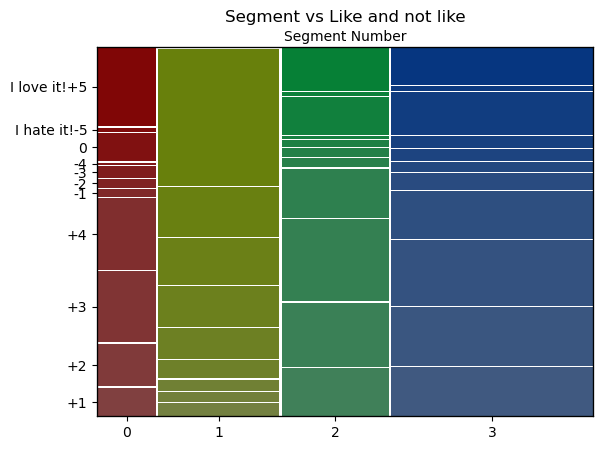

In [47]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Create a cross-tabulation table
ctab = pd.crosstab(seg_vars_numeric['Cluster'], df['Like'])

# Plot the mosaic plot
plt.figure(figsize=(10, 6))
mosaic(ctab.stack(), title='Segment vs Like and not like', labelizer=lambda k: '')
plt.xlabel('Segment Number')
plt.ylabel('Like and not like')
plt.show()

The segment 4 shows people love it comparaitively with other segments.The size of segment 4 tile represents the number of individuals in that segment- Life and dislike combination. Larger tile of segment 4 indicate a higher frequency of that combination in the dataset.

In [42]:
## Mosaic Plot for Segment Membership and Gender:

<Figure size 800x600 with 0 Axes>

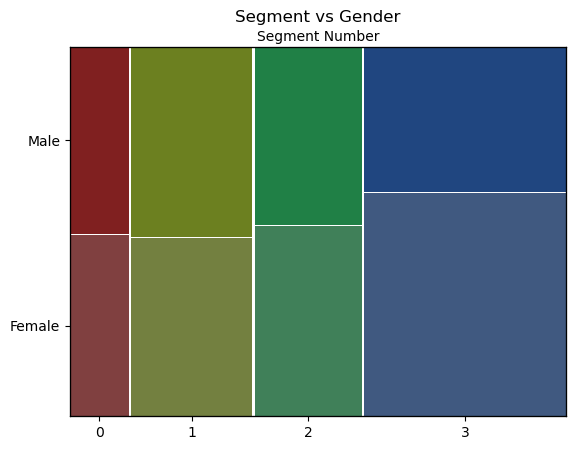

In [43]:
ctab_gender = pd.crosstab(seg_vars_numeric['Cluster'], df['Gender'])

plt.figure(figsize=(8, 6))
mosaic(ctab_gender.stack(), title='Segment vs Gender', labelizer=lambda k: '')
plt.xlabel('Segment Number')
plt.ylabel('Gender')
plt.show()

The size of Female with cluster 4 tile represents the number of individuals in that segment-gender combination. Larger tiles indicate a higher frequency of that combination in the dataset.
A lighter shade or white color indicates that segment has fewer females than expected if gender and segment were independent.

In [44]:
## Parallel Box-and-Whisker Plot for Age by Segment:

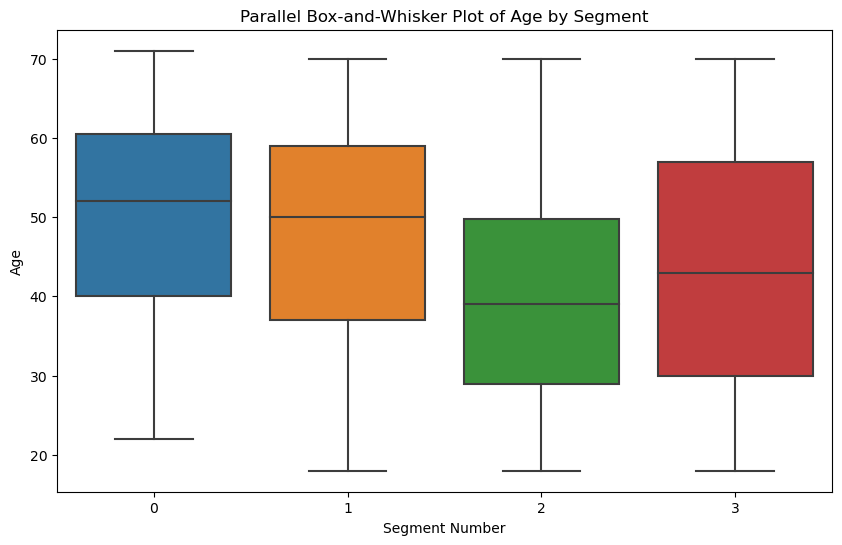

In [45]:
seg_vars_numeric['Age']=df['Age']
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=seg_vars_numeric)
plt.xlabel('Segment Number')
plt.ylabel('Age')
plt.title('Parallel Box-and-Whisker Plot of Age by Segment')
plt.show()

segment 3 – consumers who think McDonald’s is yummy and tasty, but expensive
– are younger than the members of all other segments. The parallel box-andwhisker
plot shows this by (1) the box being in lower position; and (2) the notch
in the middle of the box being lower and not overlapping with the notches of the
other boxes.
The segment 3 shows the median age of about 45yrs .It's the age at which half of the individuals in Segment 3 are in the age of between 30 to 45( middle age people), and half are older.

## Selecting (the) Target Segment(s)

In [83]:
seg_vars = df.iloc[:, :11]

seg_vars_numeric = (seg_vars == "Yes").astype(int)

In [143]:
seg_vars_numeric['VisitFrequency']=df['VisitFrequency']
seg_vars_numeric['Gender']=df['Gender']
seg_vars_numeric['Age']=df['Age']
like_counts = df['Like'].value_counts().sort_index(ascending=False)
seg_vars_numeric['Like.n'] = 6 - df['Like'].map(like_counts.to_dict())
seg_vars_numeric['Like']= df['Like']

In [144]:
seg_vars_numeric.head(2)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Cluster,VisitFrequency,Gender,Age,Like.n,Like
0,0,1,0,1,0,1,1,0,1,0,0,1,Every three months,Female,61,-67,-3
1,1,1,0,1,1,1,1,1,1,0,0,2,Every three months,Female,51,-181,+2


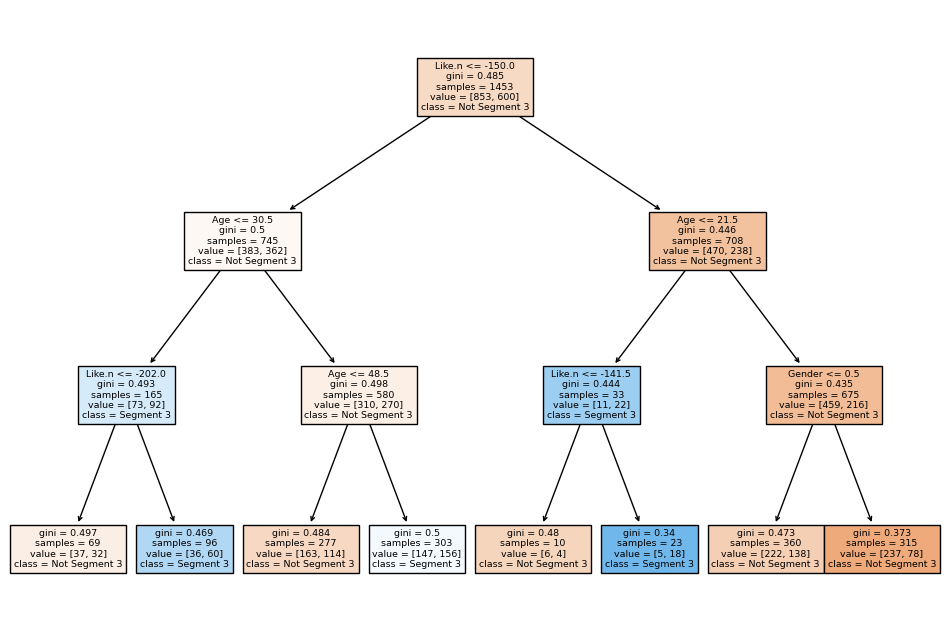

In [92]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
seg_vars_numeric['Gender'] = le.fit_transform(seg_vars_numeric['Gender'])
seg_vars_numeric['VisitFrequency'] = le.fit_transform(seg_vars_numeric['VisitFrequency'])


X = seg_vars_numeric[['Like.n', 'Age', 'VisitFrequency', 'Gender']] 
y = (seg_vars_numeric['Cluster'] == 3)


tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=list(X.columns), class_names=['Not Segment 3', 'Segment 3'], filled=True)
plt.show()

In [145]:
gender_mapping = {'Male': 0, 'Female': 1}
seg_vars_numeric['Gender'] = seg_vars_numeric['Gender'].map(gender_mapping)
seg_vars_numeric['VisitFrequency'] = le.fit_transform(seg_vars_numeric['VisitFrequency'])

In [146]:
seg_vars_numeric['VisitFrequency'] = le.fit_transform(seg_vars_numeric['VisitFrequency'])

In [147]:
data = seg_vars_numeric


In [148]:
visit_mean = data.groupby('Cluster')['VisitFrequency'].mean()
like_mean = data.groupby('Cluster')['Like.n'].mean()
female_mean = data.groupby('Cluster')['Gender'].apply(lambda x: (x == 1).mean())  # Assuming 1 represents females

In [149]:
print(visit_mean)
print(like_mean)
print(female_mean)

Cluster
0    2.565714
1    2.711111
2    2.569182
3    2.651667
Name: VisitFrequency, dtype: float64
Cluster
0   -159.108571
1   -119.380556
2   -164.757862
3   -155.851667
Name: Like.n, dtype: float64
Cluster
0    0.491429
1    0.483333
2    0.515723
3    0.606667
Name: Gender, dtype: float64


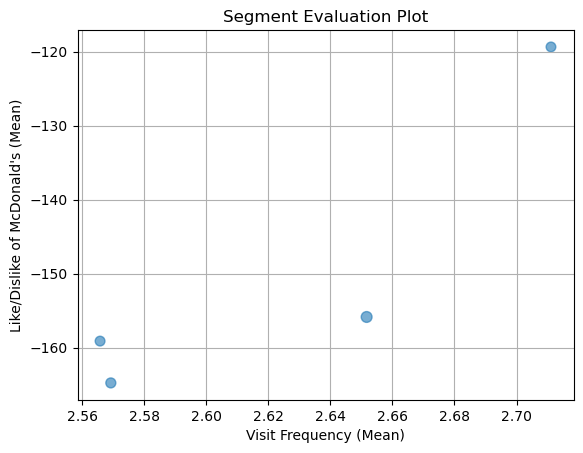

In [150]:
plt.scatter(visit_mean, like_mean, s=100 * female_mean, alpha=0.6)
plt.xlabel('Visit Frequency (Mean)')
plt.ylabel('Like/Dislike of McDonald\'s (Mean)')
plt.title('Segment Evaluation Plot')
plt.grid(True)
plt.show()

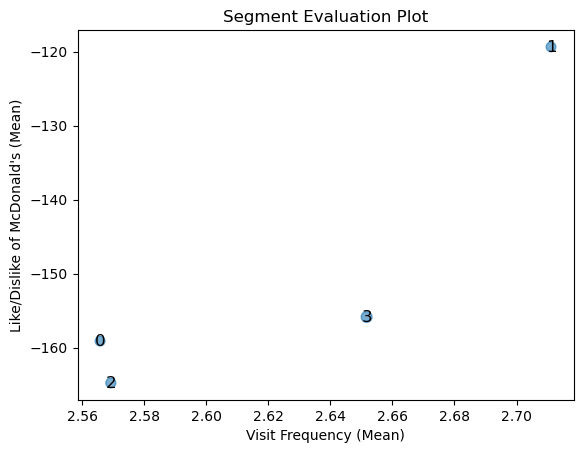

In [151]:
plt.scatter(visit_mean, like_mean, s=100 * female_mean, alpha=0.6)
plt.xlabel('Visit Frequency (Mean)')
plt.ylabel('Like/Dislike of McDonald\'s (Mean)')
plt.title('Segment Evaluation Plot')

# Add segment numbers as text labels
for i, txt in enumerate(visit_mean.index):
    plt.text(visit_mean[i], like_mean[i], str(txt), ha='center', va='center', fontsize=12)

plt.show()

Bubbles closer to the top-right quadrant are more desirable as they indicate segments with both high visit frequency and positive brand sentiment.

## Customising the Marketing Mix

The customization of the marketing mix (Product, Price, Promotion, Place) to meet the unique needs and characteristics of a specific market segment. It aims to attract and retain customers by offering products and experiences that align with their preferences, behaviors, and affordability thresholds.
Market segmentation, the focus shifts to designing the marketing mix tailored specifically for the chosen target segment.new product line called MCSUPERBUDGET to cater to the price expectations of segment 3, which consists of young customers who like McDonald's but find it expensive.
The advantage of this approach is that it addresses the specific needs and price sensitivity of segment 3. The product features of MCSUPERBUDGET would be designed to align with their preferences and price expectations.The pricing strategy for MCSUPERBUDGET would be designed to meet the affordability criteria of segment 3. This could involve offering lower prices, discounts, value meals, or promotions targeted specifically at this segment.Communication channels that are heavily used by segment 3 should be identified and utilized to promote the availability of MCSUPERBUDGET products. This could include social media campaigns, targeted advertisements, influencer marketing, or other promotional activities.McDonald's management could consider implementing a separate lane or system for MCSUPERBUDGET orders to prevent cannibalization and manage customer expectations regarding wait times.